# Opening image data

The first go-to library for opening image data is the [scikit-image](https://scikit-image.org) library. It comes with two functions, `imread` and `imshow` for reading and visualizing image data. It processes various file formats such as `.tif`. If it does not manage to open your image data properly, you need to search for customized solutions.

In [1]:
from skimage.io import imread, imshow
import numpy as np

In [2]:
image = imread('../../data/blobs.tif')
image.shape

(254, 256)

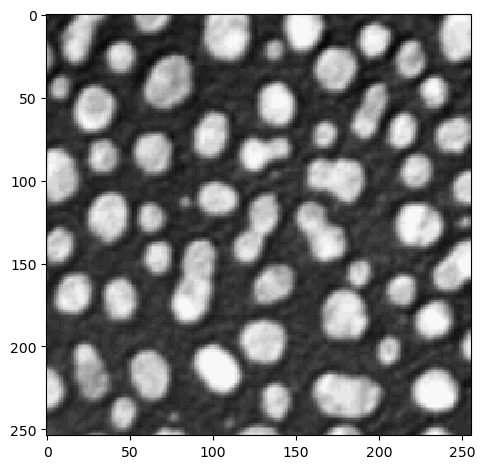

In [3]:
imshow(image)

## Reading meta data

When processing microscopy image data, it is quite important to respect the voxel size of image data. In particular when volumes should be computed in cubic microns, it is key to know how large a voxel is in X, Y and Z.

In [4]:
filename = "../../data/EM_C_6_c0.tif"

image_3d = imread(filename)
image_3d.shape

(256, 256, 256)

The following helper function was written for ImageJ Tif images. IT allows us to read the voxel size from the TIF file's metadata. [Source](https://github.com/napari/napari/issues/5165#issuecomment-1268525176).

In [5]:
def get_voxel_size_from_imagej_tiff(filename):
    """ Opens the metadata of a tiff file and returns the voxels size as (z,y,x)"""
    from PIL import Image
    from PIL.ExifTags import TAGS

    # format the meta data so that we can read it easily
    with Image.open(filename) as img:
        meta_dict = {}
        for key in img.tag.keys():
            if key in TAGS.keys():
                meta_dict[TAGS[key]] = img.tag[key]
                
    # read out voxel size from meta data
    z = [w[8:] for w in meta_dict['ImageDescription'][0].split("\n") if w.startswith('spacing')]
    x = 1/ (meta_dict["XResolution"][0][0]/meta_dict["XResolution"][0][1])
    y = 1/ (meta_dict["YResolution"][0][0]/meta_dict["YResolution"][0][1])

    return float(z[0]), float("%.4f" % y), float("%.4f" % x)

In [6]:
get_voxel_size_from_imagej_tiff(filename)

(0.16784672897196262, 0.1678, 0.1678)